---
* title: "Fitbit Data Analysis Processing"
* author: "Alvin Aw Yong"
* date: "2024-11-04"
* output: html_document

--- 
### Analyze Overview

#### Load libriaries
----

In [1]:
# Install necessary packages if not already installed
if (!require(dplyr)) install.packages("dplyr")
if (!require(ggplot2)) install.packages("ggplot2")
if (!require(tidyverse)) install.packages("tidyverse")
if (!require(scales)) install.packages("scales")
if (!require(lubridate)) install.packages("lubridate")
if (!require(reshape2)) install.packages("reshape2")

# Load libraries
library(dplyr)
library(ggplot2)
library(tidyr)
library(scales)
library(lubridate)
library(reshape2)

Loading required package: dplyr


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: ggplot2

Loading required package: tidyverse

── Attaching core tidyverse packages ──────────────────────────────────── tidyverse 2.0.0 ──
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ lubridate 1.9.3     ✔ tibble    3.2.1
✔ purrr     1.0.2     ✔ tidyr     1.3.1
✔ readr     2.1.5     
── Conflicts ────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Loading required package: scales


Attaching package: ‘scales’


The following object is masked from ‘package:purrr’:

    discard


The following object is masked from ‘package:readr’:



The downloaded binary packages are in
	/var/folders/nt/zp2zjd3s6njcmm_c4913ntnr0000gn/T//RtmpTb3mBT/downloaded_packages



Attaching package: ‘reshape2’


The following object is masked from ‘package:tidyr’:

    smiths




---
#### Load merge data from cleaned data file
---

In [2]:
merged_data <- read.csv("cleaned_integrated_data.csv")

---
#### Inspect data
---

In [3]:
# Check the structure of the dataset
str(merged_data)

# Get a summary of the dataset
summary(merged_data)

# Check the first few rows of the dataset
head(merged_data)

# Check for missing values
sum(is.na(merged_data))

# Get a quick overview of key statistics like mean, min, max
summary(merged_data$totalsteps)
summary(merged_data$calories.x)

'data.frame':	940 obs. of  30 variables:
 $ id                        : num  1.5e+09 1.5e+09 1.5e+09 1.5e+09 1.5e+09 ...
 $ activityday               : chr  "2016-04-12" "2016-04-13" "2016-04-14" "2016-04-15" ...
 $ totalsteps                : int  13162 10735 10460 9762 12669 9705 13019 15506 10544 9819 ...
 $ totaldistance             : num  8.5 6.97 6.74 6.28 8.16 ...
 $ trackerdistance           : num  8.5 6.97 6.74 6.28 8.16 ...
 $ loggedactivitiesdistance  : num  0 0 0 0 0 0 0 0 0 0 ...
 $ veryactivedistance.x      : num  1.88 1.57 2.44 2.14 2.71 ...
 $ moderatelyactivedistance.x: num  0.55 0.69 0.4 1.26 0.41 ...
 $ lightactivedistance.x     : num  6.06 4.71 3.91 2.83 5.04 ...
 $ sedentaryactivedistance.x : num  0 0 0 0 0 0 0 0 0 0 ...
 $ veryactiveminutes.x       : int  25 21 30 29 36 38 42 50 28 19 ...
 $ fairlyactiveminutes.x     : int  13 19 11 34 10 20 16 31 12 8 ...
 $ lightlyactiveminutes.x    : int  328 217 181 209 221 164 233 264 205 211 ...
 $ sedentaryminutes.x        

       id            activityday          totalsteps    totaldistance   
 Min.   :1.504e+09   Length:940         Min.   :    0   Min.   : 0.000  
 1st Qu.:2.320e+09   Class :character   1st Qu.: 3790   1st Qu.: 2.620  
 Median :4.445e+09   Mode  :character   Median : 7406   Median : 5.245  
 Mean   :4.855e+09                      Mean   : 7638   Mean   : 5.490  
 3rd Qu.:6.962e+09                      3rd Qu.:10727   3rd Qu.: 7.713  
 Max.   :8.878e+09                      Max.   :36019   Max.   :28.030  
                                                                        
 trackerdistance  loggedactivitiesdistance veryactivedistance.x
 Min.   : 0.000   Min.   :0.0000           Min.   : 0.000      
 1st Qu.: 2.620   1st Qu.:0.0000           1st Qu.: 0.000      
 Median : 5.245   Median :0.0000           Median : 0.210      
 Mean   : 5.475   Mean   :0.1082           Mean   : 1.503      
 3rd Qu.: 7.710   3rd Qu.:0.0000           3rd Qu.: 2.053      
 Max.   :28.030   Max.   :4.9421

,id,activityday,totalsteps,totaldistance,trackerdistance,loggedactivitiesdistance,veryactivedistance.x,moderatelyactivedistance.x,lightactivedistance.x,sedentaryactivedistance.x,⋯,sedentaryactivedistance.y,lightactivedistance.y,moderatelyactivedistance.y,veryactivedistance.y,steptotal,avg_heart_rate,sleepday,totalsleeprecords,totalminutesasleep,totaltimeinbed
,<dbl>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<chr>,<int>,<int>,<int>
1,1503960366,2016-04-12,13162,8.50,8.50,0,1.88,0.55,6.06,0,⋯,0,6.06,0.55,1.88,13162,78.61406,4/12/2016 12:00:00 AM,1,327,346
2,1503960366,2016-04-13,10735,6.97,6.97,0,1.57,0.69,4.71,0,⋯,0,4.71,0.69,1.57,10735,78.61406,4/13/2016 12:00:00 AM,2,384,407
3,1503960366,2016-04-14,10460,6.74,6.74,0,2.44,0.40,3.91,0,⋯,0,3.91,0.40,2.44,10460,78.61406,NA,NA,NA,NA
4,1503960366,2016-04-15,9762,6.28,6.28,0,2.14,1.26,2.83,0,⋯,0,2.83,1.26,2.14,9762,78.61406,4/15/2016 12:00:00 AM,1,412,442
5,1503960366,2016-04-16,12669,8.16,8.16,0,2.71,0.41,5.04,0,⋯,0,5.04,0.41,2.71,12669,78.61406,4/16/2016 12:00:00 AM,2,340,367
6,1503960366,2016-04-17,9705,6.48,6.48,0,3.19,0.78,2.51,0,⋯,0,2.51,0.78,3.19,9705,78.61406,4/17/2016 12:00:00 AM,1,700,712


[1] 2120

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      0    3790    7406    7638   10727   36019 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      0    1828    2134    2304    2793    4900 

---
#### Cleaning and transforming
---

In [4]:
# Remove rows with NA values in specific columns
merged_data_clean <- na.omit(merged_data)

In [5]:
# Replace NAs with the mean value in `totalsteps`
merged_data$totalsteps[is.na(merged_data$totalsteps)] <- mean(merged_data$totalsteps, na.rm = TRUE)

In [6]:
# Convert activityday and sleepday to Date type
merged_data$activityday <- as.Date(merged_data$activityday, format="%Y-%m-%d")
merged_data$sleepday <- as.Date(merged_data$sleepday, format="%m/%d/%Y")

---
### Analyze - Steps and Calories

##### Perform calculations
---

In [7]:
# Calculate the total number of steps per month (aggregated by month_year)
merged_data$month_year <- format(merged_data$activityday, "%Y-%m")
monthly_steps <- merged_data %>%
  group_by(month_year) %>%
  summarise(steptotal = sum(steptotal, na.rm = TRUE), 
            average_steps = mean(steptotal, na.rm = TRUE))

# Calculate the average calories burned per day
average_calories <- mean(merged_data$calories.x, na.rm = TRUE)

# Add new columns for the difference between steps and calories burned
merged_data <- merged_data %>%
  mutate(steps_to_calories_ratio = totalsteps / calories.x)

---
#### Identify trends and relationship
---

`geom_smooth()` using formula = 'y ~ x'


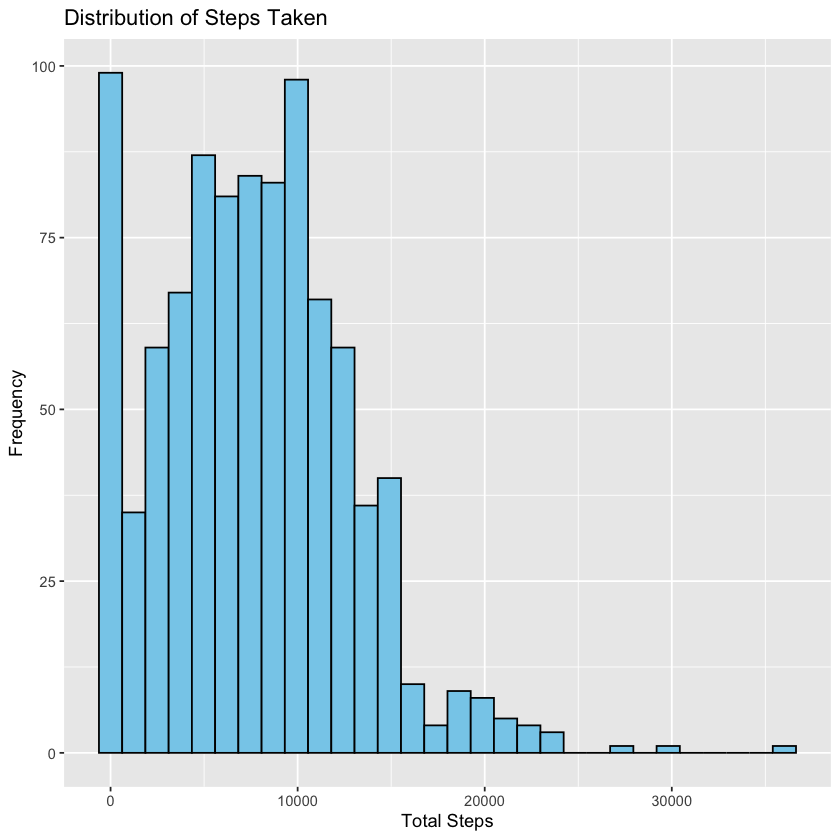

[1] 0.5915681

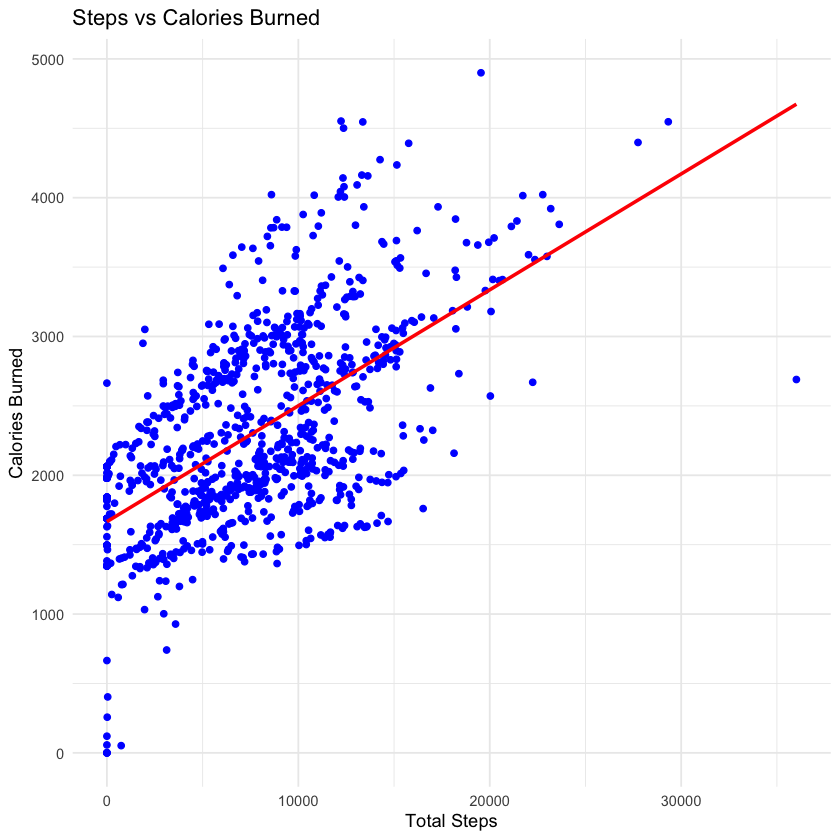

In [8]:
# Plot the distribution of steps taken
ggplot(merged_data, aes(x=totalsteps)) +
  geom_histogram(bins=30, fill="skyblue", color="black") +
  labs(title="Distribution of Steps Taken", x="Total Steps", y="Frequency")

# Scatter plot between steps and calories burned with trendline
ggplot(merged_data, aes(x = totalsteps, y = calories.x)) +
  geom_point(color = "blue") +  # Scatterplot points
  geom_smooth(method = "lm", se = FALSE, color = "red") +  # Linear trendline
  labs(title = "Steps vs Calories Burned", x = "Total Steps", y = "Calories Burned") +
  theme_minimal()  # Optional: for cleaner aesthetics

# Calculate correlation between total steps and calories burned
cor(merged_data$totalsteps, merged_data$calories.x, use="complete.obs")

---
#### Futher investigation
---

`geom_smooth()` using formula = 'y ~ x'


[1] 0.6158383

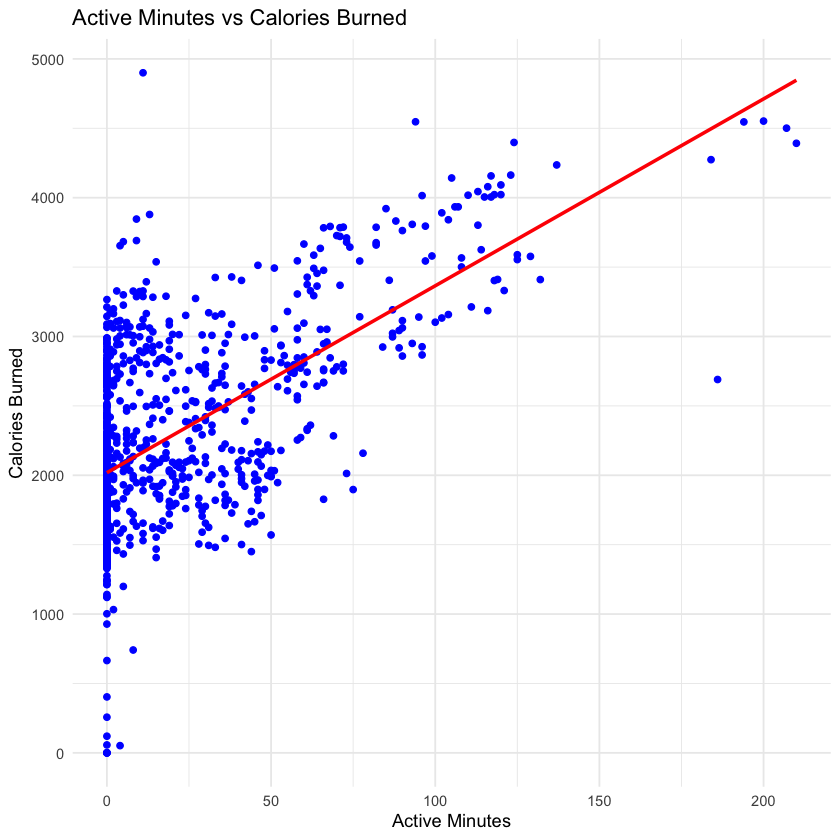

In [9]:
# Scatter plot for active minutes vs calories burned with trendline
ggplot(merged_data, aes(x = veryactiveminutes.x, y = calories.x)) +
  geom_point(color = "blue") +  # Scatterplot points
  geom_smooth(method = "lm", se = FALSE, color = "red") +  # Linear trendline
  labs(title = "Active Minutes vs Calories Burned", x = "Active Minutes", y = "Calories Burned") +
  theme_minimal()  # Optional: for cleaner aesthetics

# Calculate the correlation between active minutes and calories burned
cor(merged_data$veryactiveminutes.x, merged_data$calories.x, use="complete.obs")

---
### Analyze - Explore Additional Relationships

#### Correlation Heatmap of Health Metrics
---

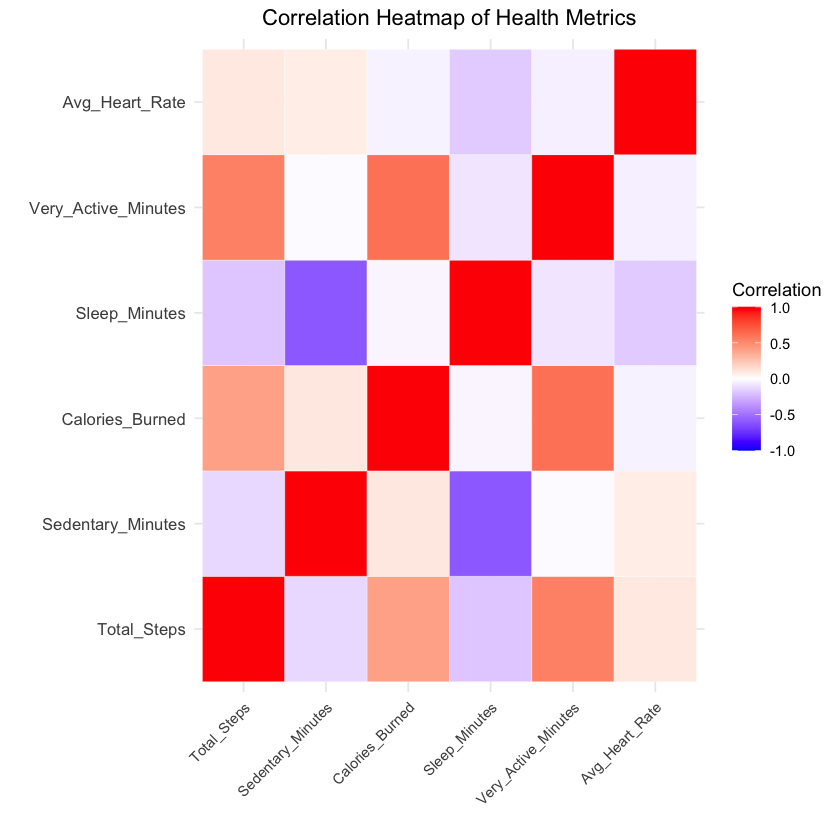

In [10]:
# Select and rename relevant numeric columns for the correlation matrix
numeric_cols <- merged_data %>%
  select(
    Total_Steps = totalsteps,
    Sedentary_Minutes = sedentaryminutes.x,
    Calories_Burned = calories.x,
    Sleep_Minutes = totalminutesasleep,
    Very_Active_Minutes = veryactiveminutes.x,
    Avg_Heart_Rate = avg_heart_rate
  )

# Calculate the correlation matrix
cor_matrix <- cor(numeric_cols, use = "complete.obs")

# Melt the correlation matrix for ggplot
melted_cor_matrix <- melt(cor_matrix)

# Plot the heatmap with improved readability
ggplot(data = melted_cor_matrix, aes(x = Var1, y = Var2, fill = value)) +
  geom_tile(color = "white") +
  scale_fill_gradient2(
    low = "blue", high = "red", mid = "white",
    midpoint = 0, limit = c(-1, 1), name = "Correlation"
  ) +
  labs(title = "Correlation Heatmap of Health Metrics", x = "", y = "") +
  theme_minimal() +
  theme(
    axis.text.x = element_text(angle = 45, vjust = 1, hjust = 1),
    axis.text.y = element_text(size = 10),
    plot.title = element_text(hjust = 0.5)
  )

---
### Analyze - User Engagement

#### Step Challenge
---

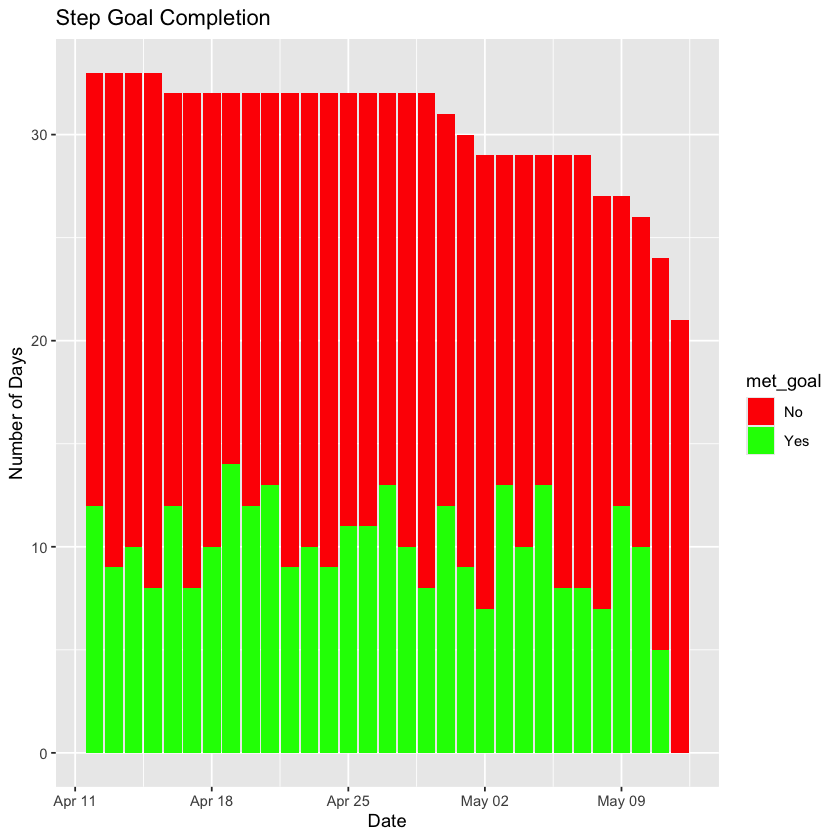

In [14]:
# Define a step goal
step_goal <- 10000

# Create a new column to check if the goal was met
merged_data$met_goal <- ifelse(merged_data$totalsteps >= step_goal, "Yes", "No")

# Plot the number of days users met the step goal
ggplot(merged_data, aes(x=activityday, fill=met_goal)) +
  geom_bar() +
  labs(title="Step Goal Completion", x="Date", y="Number of Days") +
  scale_fill_manual(values = c("Yes" = "green", "No" = "red"))

---
#### Monthly Reward Progress for Meeting Step Goals
---

`geom_smooth()` using formula = 'y ~ x'
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“span too small.   fewer data values than degrees of freedom.”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“at  16892”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“radius  0.0225”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“all data on boundary of neighborhood. make span bigger”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“pseudoinverse used at 16892”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“neighborhood radius 0.15”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“reciprocal condition number  1”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“

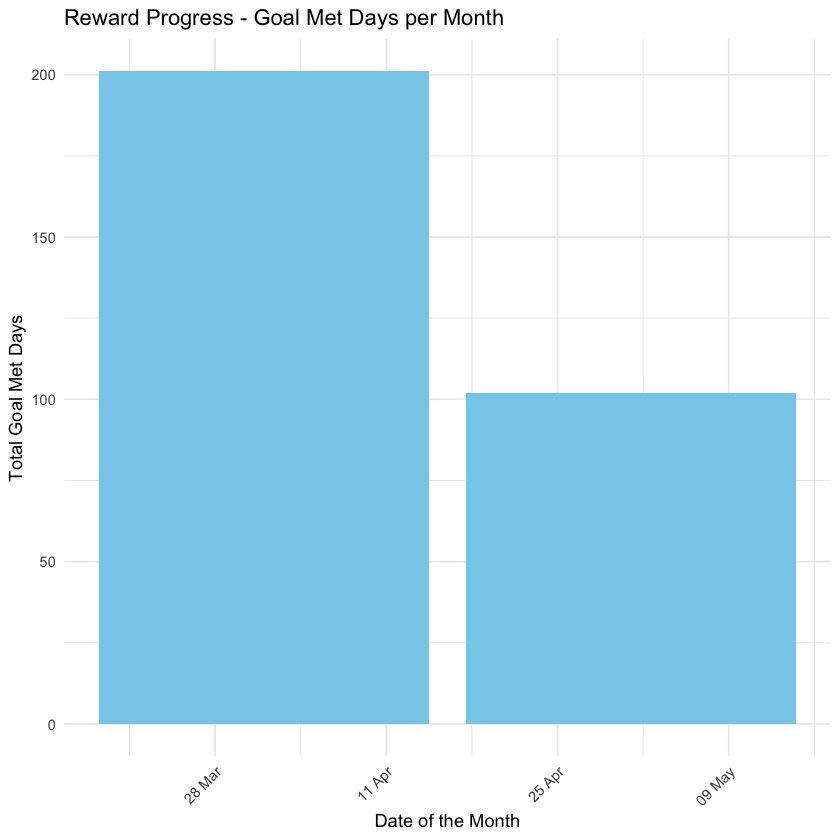

In [18]:
# Convert activityday to month and set a specific date within each month (e.g., 1st day of the month)
merged_data$month_date <- as.Date(paste0(format(as.Date(merged_data$activityday), "%Y-%m"), "-01"))

# Calculate the total goal met days across all users per month
monthly_goal_met <- merged_data %>%
  group_by(month_date) %>%
  summarise(total_goal_met_days = sum(met_goal == "Yes"))

# Plot with more vertical gridlines (e.g., every 2 weeks)
ggplot(monthly_goal_met, aes(x = month_date, y = total_goal_met_days)) +
  geom_bar(stat = "identity", fill = "skyblue") +
  geom_smooth(method = "loess", color = "darkblue", se = FALSE) + # Adding a trendline
  labs(title = "Reward Progress - Goal Met Days per Month",
       x = "Date of the Month",
       y = "Total Goal Met Days") +
  scale_x_date(date_labels = "%d %b", date_breaks = "2 weeks") + # More frequent x-axis labels
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))